# ロジスティック回帰

## L2正則化

/Users/daisuketsumita/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/daisuketsumita/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
train
----------------
TP:4285|FP:3233
FN:26772|TN:115493
----------------
Precision:0.5699654163341314, Recall:0.13797211578710114, F-score:0.2221646143875567
----------------
test
TP:1204|FP:974 
FN:7591|TN:33027
----------------
Precision:0.5528007346189164, Recall:0.13689596361569073, F-score:0.21944773535040557
----------------

Threshold:  [0.01437778 0.01439661 0.01474872 ... 0.83135764 0.84091826 0.8466802 ]


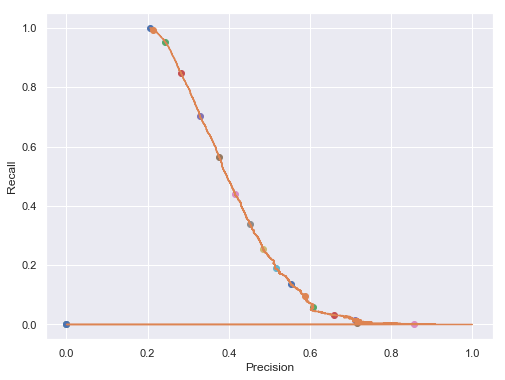

Confusion matrix
new threshold:  0.6
----------------
TP:509 |FP:328 
FN:8286|TN:33673
----------------
Precision:0.6081242532855436, Recall:0.05787379192723138, F-score:0.10568936877076412


In [3]:
lr = LogisticRegression(penalty="l2", C=0.05)
lr.fit(x_vals_train, y_vals_train)
validation(lr, x_vals_train, y_vals_train, x_vals_dev, y_vals_dev)

In [43]:
def plot_odds_pred_ralation(model, split_val=5000, odds_threshold=30, mode='all', colors=None):
    new_x_vals_dev, new_y_vals_dev, new_odds_dev, prob_test_posi = [],[],[],[]

    # x_vals_dev_ = x_vals_dev[:split_val]
    # y_vals_dev_ = y_vals_dev[:split_val]
    # odds_dev_   = odds_dev[:split_val]

    prob_test_posi_all = model.predict_proba(x_vals_dev)[:, 1]

    for i in range(len(x_vals_dev)):
        if odds_dev[i] <= odds_threshold:
            if mode == 'all':
                new_x_vals_dev.append(x_vals_dev[i])
                new_y_vals_dev.append(y_vals_dev[i])
                new_odds_dev.append(odds_dev[i])
                prob_test_posi.append(prob_test_posi_all[i])
            if mode == 'posi' and y_vals_dev[i] == 1:
                new_x_vals_dev.append(x_vals_dev[i])
                new_odds_dev.append(odds_dev[i])
                prob_test_posi.append(prob_test_posi_all[i])
            if mode == 'nega' and y_vals_dev[i] == 0:
                new_x_vals_dev.append(x_vals_dev[i])
                new_odds_dev.append(odds_dev[i])
                prob_test_posi.append(prob_test_posi_all[i])

    
    if mode == 'all':
        plt.figure(figsize=(14,8))
        plt.scatter(prob_test_posi[:split_val], new_odds_dev[:split_val], c=new_y_vals_dev[:split_val], edgecolors='blue', cmap='Blues', vmin=0., vmax=1.)
    else:
        plt.figure(figsize=(10,6))
        plt.scatter(prob_test_posi[:split_val], new_odds_dev[:split_val], edgecolors=colors[0], c=colors[1], vmin=0., vmax=1.)
    plt.title("Odds Show relation {}".format(mode))
    plt.xlabel("predict show rate")
    plt.ylabel("odds")
    plt.grid(True)
    if mode == 'all':
        plt.colorbar()
    else:
        plt.show()
#         plt.figure(figsize=(10,3))
#         plt.hist(prob_test_posi, color="orange", rwidth=0.8, alpha=0.6)
#         plt.xlabel("predict show rate")
#         plt.ylabel("frequency")
        fig, ax1 = plt.subplots(figsize=(10,3))
        # ヒストグラムプロットとビン情報の取得
        n, bins, patches = ax1.hist(prob_test_posi, color="orange", rwidth=0.8, alpha=0.7, label='Frequency')
        # 第2軸用値の算出
        y2 = np.add.accumulate(n[::-1]) / n.sum()
        y2 = y2[::-1]
#         y2 = n / n.sum()
        x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]
        # 第2軸のプロット
        ax2 = ax1.twinx()
        lines = ax2.plot(x2, y2, ls='--', color='r', marker='o', label='Cumulative ratio')
        ax2.grid(visible=False)
        plt.show()


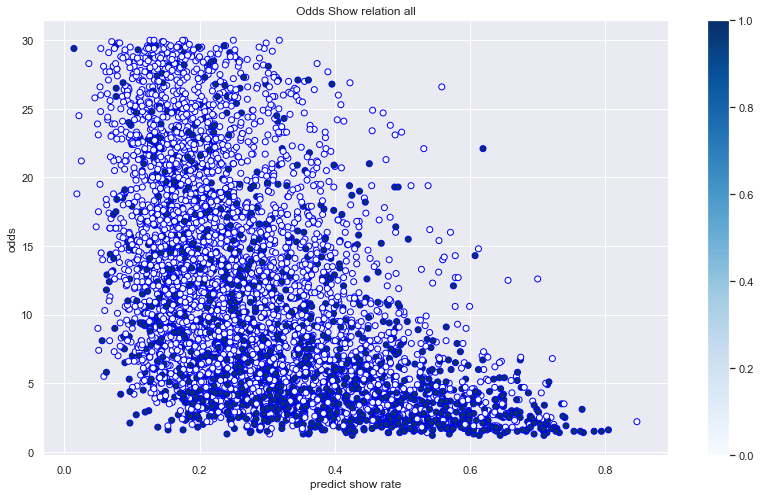

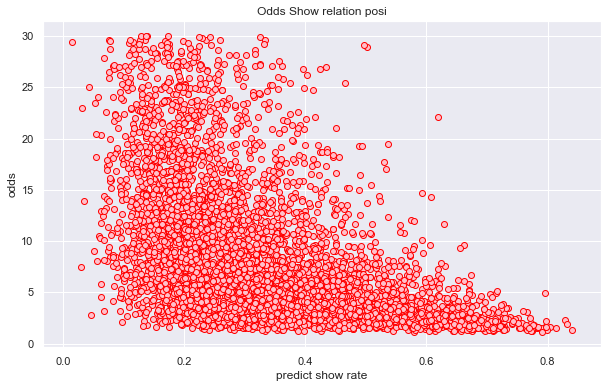

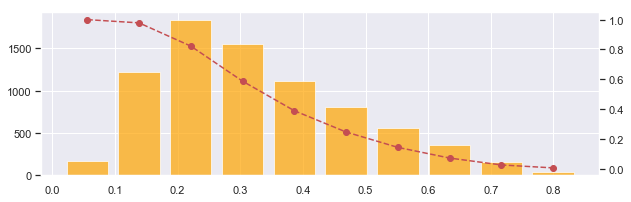

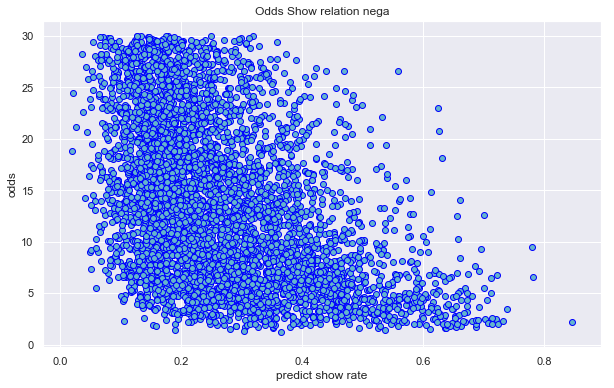

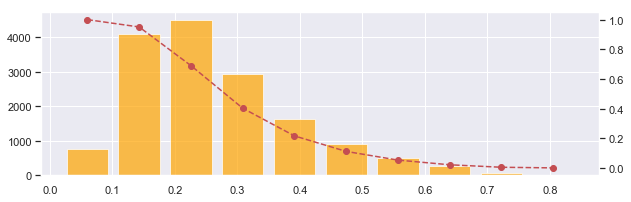

In [44]:
plot_odds_pred_ralation(lr, split_val=5000, odds_threshold=30, mode='all')
plot_odds_pred_ralation(lr, split_val=5000, odds_threshold=30, mode='posi', colors=["red", "pink"])
plot_odds_pred_ralation(lr, split_val=5000, odds_threshold=30, mode='nega', colors=["blue", "c"])

## L1正則化

/Users/daisuketsumita/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/daisuketsumita/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
train
----------------
TP:4282|FP:3254
FN:26775|TN:115472
----------------
Precision:0.5682059447983014, Recall:0.13787551920662008, F-score:0.22190552690902493
----------------
test
TP:1225|FP:983 
FN:7570|TN:33018
----------------
Precision:0.5548007246376812, Recall:0.13928368391131324, F-score:0.22266654548759432
----------------

Threshold:  [0.01357584 0.01359137 0.01387089 ... 0.83548053 0.83644732 0.84847053]


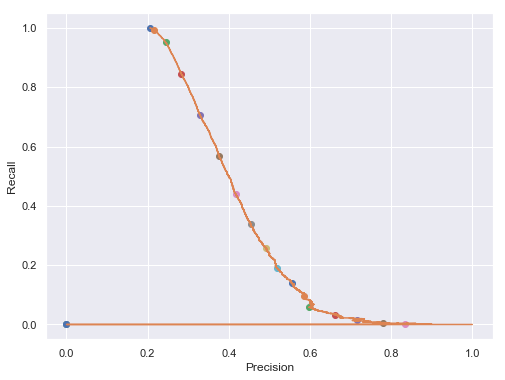

Confusion matrix
new threshold:  0.6
----------------
TP:509 |FP:342 
FN:8286|TN:33659
----------------
Precision:0.5981198589894242, Recall:0.05787379192723138, F-score:0.10553597346050175


In [45]:
lr = LogisticRegression(penalty="l1", C=0.05)
lr.fit(x_vals_train, y_vals_train)
validation(lr, x_vals_train, y_vals_train, x_vals_dev, y_vals_dev)

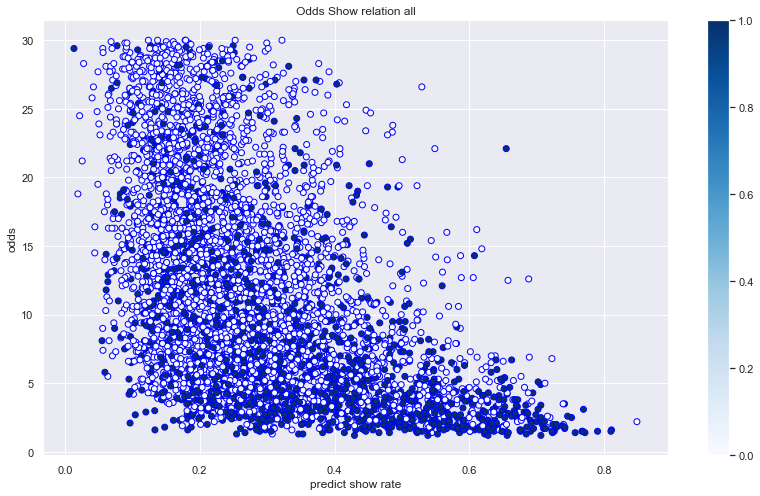

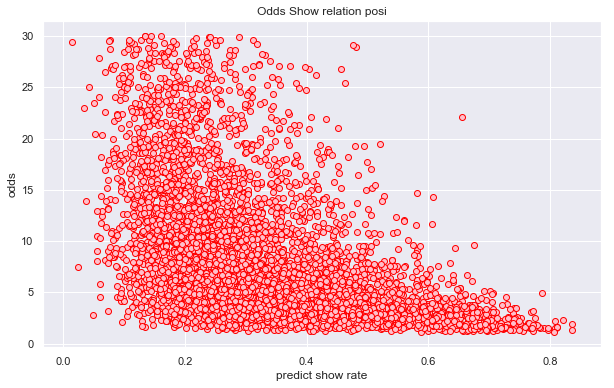

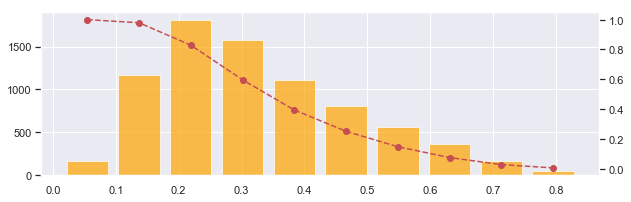

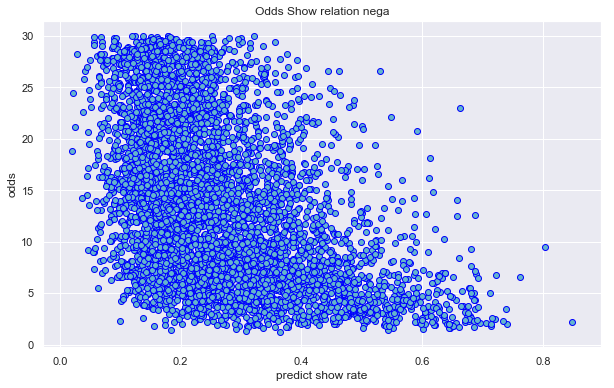

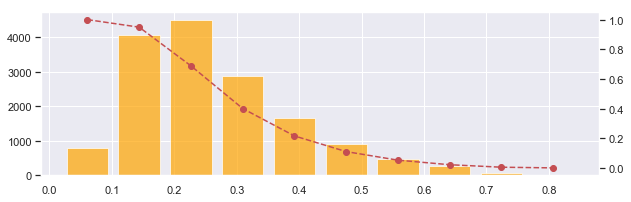

In [46]:
plot_odds_pred_ralation(lr, split_val=5000, odds_threshold=30, mode='all')
plot_odds_pred_ralation(lr, split_val=5000, odds_threshold=30, mode='posi', colors=["red", "pink"])
plot_odds_pred_ralation(lr, split_val=5000, odds_threshold=30, mode='nega', colors=["blue", "c"])

<Figure size 720x504 with 0 Axes>

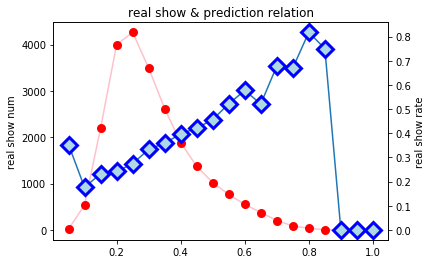

In [99]:
prob_show_rate_list = [0.05*(i+1) for i in range(20)]
show_rate_list = [[0,0] for i in range(20)]

for prob, real, odds in zip(prob_test_posi, new_y_vals_dev, new_odds_dev):
    for idx in range(len(prob_show_rate_list)):
        border = prob_show_rate_list[idx]
        if prob < border:
            if real == 1:
                show_rate_list[idx][0] += 1
            show_rate_list[idx][1] += 1
            break

all_num_list = [li[1] for li in show_rate_list]
show_rate_list = [li[0]/li[1] if li[1]!=0 else 0 for li in show_rate_list]

plt.figure(figsize=(10,7))
_, ax1 = plt.subplots()
plt.title("real show & prediction relation")
ax1.plot(prob_show_rate_list, all_num_list, marker=".", color="pink", markersize=12, markeredgewidth=3, 
         markeredgecolor="r", markerfacecolor="r")
plt.ylabel("real show num")
ax2 = ax1.twinx()
ax2.plot(prob_show_rate_list, show_rate_list, marker="D", markersize=12, markeredgewidth=3, 
         markeredgecolor="blue", markerfacecolor="lightblue")
plt.xlabel("predict show rate")
plt.ylabel("real show rate")

plt.show()

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, average_precision_score


year_range = [2010, 2014] ## 2010から2014年のデータ
data_version = 1 ## dataのバージョン
data_ver_str = str(data_version) if data_version >= 10 else '0'+str(data_version)

## load
with open("./keiba_data_new_ver{0}/keiba_feature_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    x_vals_train = pkl.load(f)  
with open("./keiba_data_new_ver{0}/keiba_feature_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    x_vals_dev = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_feature_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    x_vals_test = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_label_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    y_vals_train = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_label_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    y_vals_dev = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_label_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    y_vals_test = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_odds_trn_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    odds_train = pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_odds_dev_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    odds_dev= pkl.load(f)
with open("./keiba_data_new_ver{0}/keiba_odds_tst_{1}_{2}.pkl".format(data_ver_str, year_range[0], year_range[1]), 'rb') as f:
    odds_test = pkl.load(f)
    
new_x_vals_train, new_y_vals_train, new_odds_train = [],[],[]   
new_x_vals_dev, new_y_vals_dev, new_odds_dev = [],[],[]

for i in range(len(x_vals_train)):
    if odds_train[i] <= 200:
        new_x_vals_train.append(x_vals_train[i])
        new_y_vals_train.append(y_vals_train[i])
        new_odds_train.append(odds_train[i])
        
for i in range(len(x_vals_dev)):
    if odds_dev[i] <= 200:
        new_x_vals_dev.append(x_vals_dev[i])
        new_y_vals_dev.append(y_vals_dev[i])
        new_odds_dev.append(odds_dev[i])


        
def under_sampling(data, label, us_rate):
    posi_data, nega_data = [], []
    
    for (x,y) in zip(data,label):
        if y == 0:
            nega_data.append(x)
        else:
            posi_data.append(x)
            
    nega_len = int(len(nega_data) * us_rate)
    
    data = nega_data[0:nega_len] + posi_data
    label = [0 for _ in range(nega_len)] + [1 for _ in range(len(posi_data))]
    
    
def validation(model, train_x, train_y, test_x, test_y):
    tn, fp, fn, tp = confusion_matrix(train_y, model.predict(train_x)).ravel()
    print('Confusion matrix')
    print('train')
    print("-"*16)
    print("TP:{0:<4}|FP:{1:<4}".format(tp, fp))
    print("FN:{0:<4}|TN:{1:<4}".format(fn, tn))
    print("-"*16)
    if (tp + fp) == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    if (tp + fn) == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    if (precision + recall)==0:
        f_score = 0
    else:
        f_score = 2*precision*recall / (precision + recall)
    print("Precision:{0:<4}, Recall:{1:<4}, F-score:{2:<4}".format(precision, recall, f_score))
    tn, fp, fn, tp = confusion_matrix(test_y, model.predict(test_x)).ravel()
    print("-"*16)
    print('test')
    print("TP:{0:<4}|FP:{1:<4}".format(tp, fp))
    print("FN:{0:<4}|TN:{1:<4}".format(fn, tn))
    print("-"*16)
    if (tp + fp) == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    if (tp + fn) == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    if (precision + recall)==0:
        f_score = 0
    else:
        f_score = 2*precision*recall / (precision + recall)
    print("Precision:{0:<4}, Recall:{1:<4}, F-score:{2:<4}".format(precision, recall, f_score))
    print("-"*16)
    print()

    # ある閾値の時の適合率、再現率の値を取得
    precision, recall, threshold = precision_recall_curve(test_y, model.predict_proba(test_x)[:, 1])
    print("Threshold: ", threshold)

    plt.figure(figsize=(8,6))
    # 0から1まで0.05刻みで○をプロット
    for i in range(21):
        close_point = np.argmin(np.abs(threshold - (i * 0.05)))
        plt.plot(precision[close_point], recall[close_point], 'o')

    # 適合率-再現率曲線
    plt.plot(precision, recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')

    plt.show()
    
    
    tn, fp, fn, tp = confusion_matrix(test_y, (model.predict_proba(test_x)[:, 1] > 0.6).astype(int)).ravel()
    print('Confusion matrix')
    print('new threshold: ', 0.6)
    print("-"*16)
    print("TP:{0:<4}|FP:{1:<4}".format(tp, fp))
    print("FN:{0:<4}|TN:{1:<4}".format(fn, tn))
    print("-"*16)
    if (tp + fp) == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    if (tp + fn) == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    if (precision + recall)==0:
        f_score = 0
    else:
        f_score = 2*precision*recall / (precision + recall)
    print("Precision:{0:<4}, Recall:{1:<4}, F-score:{2:<4}".format(precision, recall, f_score))
    

In [1]:
# データの読み込み
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, svm, base
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, average_precision_score

import copy
np.set_printoptions(threshold=np.inf)

def under_sampling(data, label, us_rate):
    posi_data, nega_data = [], []
    
    for (x,y) in zip(data,label):
        if y == 0:
            nega_data.append(x)
        else:
            posi_data.append(x)
            
    nega_len = int(len(nega_data) * us_rate)
    
    data = nega_data[0:nega_len] + posi_data
    label = [0 for _ in range(nega_len)] + [1 for _ in range(len(posi_data))]
    
    return np.array(data), np.array(label)   

def make_cvdata(targetdata, isclickrow, lidrow, us_train_rate, us_test_rate = 1):
    sharedata_path = "./" + targetdata
    tcaseLID_path = "./"
 
    dataset = []
    labelset = []
    tcase = []
    dcase = []
    
    with open(sharedata_path, "r") as f:
        reader = csv.reader(f)
        header = next(reader)

        for row in reader:
            feature = row[:-1]
#             try:
            dataset.append([float(x) if x != '' else 0.0 for x in feature])
            labelset.append(int(row[-1]))
#             except:
#                 print(feature)
            
    cv_data_len = math.ceil(len(dataset)/5)
    for i in range(5):
        test_data = []
        test_label = []
        for data, label in zip(dataset[i*cv_data_len:(i+1)*cv_data_len], labelset[i*cv_data_len:(i+1)*cv_data_len]):
            test_data.append(data)
            test_label.append(label)
        tcase.append([test_data, test_label])
        

#     for i in range(5):
#         test_data = []
#         test_label = []
    
#         with open(tcaseLID_path + "testcase_%d.csv" % i, "r") as f:
#             reader = csv.reader(f)
#             for row in reader:
#                 data = dataset[row[0]]
#                 test_label.append(int(data[isclickrow]))
#                 minindex = min(isclickrow, lidrow)
#                 maxindex = max(isclickrow, lidrow)
#                 data = data[-1]
#                 del data[minindex]
#                 del data[maxindex-1]
#                 test_data.append([int(i) for i in data])
#             tcase.append([test_data, test_label])

    for i in range(5):
        x_test, y_test = tcase[i]
        x_train = tcase[(i+1)%5][0] + tcase[(i+2)%5][0] + tcase[(i+3)%5][0] + tcase[(i+4)%5][0]
        y_train = tcase[(i+1)%5][1] + tcase[(i+2)%5][1] + tcase[(i+3)%5][1] + tcase[(i+4)%5][1]
        
#         x_train, y_train = under_sampling(x_train, y_train, us_train_rate)
#         x_test, y_test = under_sampling(x_test, y_test, us_test_rate)
#         print(x_test)
#         raise
        
        dcase.append([x_train, y_train, x_test, y_test])
        
    return dcase

  
def check_rate(cvdata):
    for i in range(5):
        print("TestCase %d" %i)
        
        y_train, y_test = cvdata[i][1], cvdata[i][3]
    
        count_0, count_1 = 0,0
        for y in y_train:
            if y == 0:
                count_0 += 1
            else:
                count_1 += 1
        print("-----train_data-----")
        print("positive: ", count_1, ", negative: ", count_0)
    
        count_0, count_1 = 0,0
        for y in y_test:
            if y == 0:
                count_0 += 1
            else:
                count_1 += 1
        print("-----test_data-----")
        print("positive: ", count_1, ", negative: ", count_0)
        print("\n\n")  

In [2]:
def print_weight(clf, path):
#     try:
    with open(path, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        if path == '../../data/share_data/ds_feature.csv':
            header = header[0].split()
        header.pop(-1)
#         header.pop(-1)
        for h, c in zip(header, clf.coef_[0]):
            print('{0:<20} {1:<20}'.format(h,c))
        print()
        print("bias")
        print(clf.intercept_[0]) 
        show_importances(header,[abs(f) for f in clf.coef_[0]])
        print("-"*50)
#     except:
#         pass
    
def show_importances(header,importances):
    print(importances)
    indices = np.argsort(importances)#[::-1]
    print(indices)
    print()

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(len(importances)):
        print("{0:2}. {1:20} \t {2:20}".format(f+1, header[indices[f]], importances[indices[f]]))
        #print('{0:<20} {1:<20}'.format(h,c))

    # Plot the feature importances of the forest
    plt.figure(figsize = (10,10))
    plt.title("Feature importances")
    plt.barh(range(len(importances)), [importances[int(i)] for i in indices],color="r", align="center")
    plt.yticks(range(len(importances)), [header[int(i)] for i in indices])
    plt.ylim([-1, len(importances)])
    plt.show()
    
def print_pricision_recall_f(precision_scores, recall_scores, f1_scores, n):
    print("precision_scores :",np.round(precision_scores,n))
    print("Av_precision_score:",np.round(precision_scores.mean(),n))
    print()
    print("recall_scores       :",np.round(recall_scores,n))
    print("Av_recall_scores     :",np.round(recall_scores.mean(),n))
    print()
    print("f1_scores            :",np.round(f1_scores,n))
    print("Av_f1_scores          :",np.round(f1_scores.mean(),n))
    print("-"*60)

def fit_cross_test(clf, data_sets, path, clfType = "classbase"):
    """
    学習と精度確認。交差検証用
    
    はじめtol_designationを指定しないと返り値としてF値最大のthredsholdを返す
    """
    
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    roc_auc_scores = []
    pr_auc_scores = []
    
    train_data_size = []
    test_data_size = []
    train_p_count = [0 for i in range(len(data_sets))]
    train_n_count = [0 for i in range(len(data_sets))]
    test_p_count = [0 for i in range(len(data_sets))]
    test_n_count = [0 for i in range(len(data_sets))]
    
    prob_list = []
    test_y_list = []
    
    # データ出力
    for i, data_set in enumerate(data_sets):
        train_data_size.append(len(data_set[1]))
        test_data_size.append(len(data_set[3]))
        
        # 正例と負例のcount
        data = list(data_set)
        for d_train in data_set[1]:
            if d_train == 1:
                train_p_count[i] += 1
            else:
                train_n_count[i] += 1       
        for d_test in data_set[3]:
            if d_test == 1:
                test_p_count[i] += 1
            else:
                test_n_count[i] += 1
        
        clf = base.clone(clf)
        train_x,train_y,test_x,test_y = data_set        
        test_y_list.append(test_y)
        resLogit = clf.fit(train_x, train_y)
        if clfType == "classbase":
            pred = clf.predict(test_x)
            prob = clf.predict_proba(test_x)[:,1]
        elif clfType == "probbase":
            results = []
            results_prob = []
            for context in test_x:
                results_prob.append(clf.predict([context]))
                judge = 1 if clf.predict([context]) > 0.5 else 0
                results.append(judge)
            pred = results
            prob = results_prob
        
#         print(clf.best_params_)
        
        prob_list.append(prob)
            
        precision_scores.append(precision_score(test_y,pred))
        recall_scores.append(recall_score(test_y,pred))
        f1_scores.append(f1_score(test_y,pred))
        
        roc_auc_scores.append(roc_auc_score(test_y, prob))
        pr_auc_scores.append(average_precision_score(test_y, prob))
        if roc_auc_scores[-1] == max(roc_auc_scores):# 最大結果のROCを保存
            fpr, tpr, thresholds_roc = roc_curve(test_y, prob)
        
        if pr_auc_scores[-1] == max(pr_auc_scores):
            precision, recall, thresholds_pr = precision_recall_curve(test_y, prob)
            class_report = classification_report(test_y, pred)
            best_pred = pred
            best_y = test_y
            data_number = i
            best_clf = copy.copy(clf)
    
    precision_scores = np.array(precision_scores)
    recall_scores = np.array(recall_scores)
    f1_scores = np.array(f1_scores)
    roc_auc_scores = np.array(roc_auc_scores)
    pr_auc_scores = np.array(pr_auc_scores)
    
    n = 3 # 有効数字
    print("total data size:{}".format(sum(train_data_size)+sum(test_data_size)))
    for tr,tr_p,tr_n,te,te_p,te_n in zip(train_data_size,train_p_count,train_n_count,test_data_size,test_p_count,test_n_count):
        print("-"*40)
        print("train data:{0:<7}-正:{1:<8}負:{2:<8}".format(tr,tr_p,tr_n))
        print("test data:{0:<8}-正:{1:<8}負:{2:<8}".format(te,te_p,te_n))
    print("-"*60)
    
    print_weight(best_clf, path)
    
    print_pricision_recall_f(precision_scores, recall_scores, f1_scores, n)
        
    print("roc_auc_score:",np.round(roc_auc_scores,n))
    print("Av_roc_auc_score:",np.round(roc_auc_scores.mean(),n))
    print("-"*60)
    print("pr_auc_score:",np.round(pr_auc_scores,n))
    print("Av_pr_auc_score:",np.round(pr_auc_scores.mean(),n))
    print("-"*60)
    
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    # AUCが一番高いデータのとき
    for p, y in zip(best_pred, best_y):
        if p == 1 and y == 1:
            TP += 1
        elif p == 0 and y == 1:
            FN += 1
        elif p == 1 and y == 0:
            FP += 1
        else:
            TN += 1
    print("TP:{0:<4}|FP:{1:<4}".format(TP,FP))
    print("FN:{0:<4}|TN:{1:<4}".format(FN,TN))
    print("-"*60)
    print(class_report)
    
    # 図の描画
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.plot(fpr, tpr)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.text(0.81,    0.02, 'AUC : {}'.format(np.round(max(roc_auc_scores),n)), ha = 'center', va = 'bottom')

    plt.subplot(122)
    plt.plot(recall, precision)
    plt.title("Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.text(0.81,    0.51, 'AUC : {}'.format(np.round(max(pr_auc_scores),n)), ha = 'center', va = 'bottom')
    plt.show()
    print("-"*70)


    max_f_measure = 0
    for (i, p), r in zip(enumerate(precision), recall):
        f_measure = (2*p*r)/(r+p)
        if max_f_measure < f_measure:
            max_f_measure = f_measure
            index = i
    th = thresholds_pr[index]
    print("best thresholds:{}".format(th))
    print("-"*30 + "閾値の変更" + "-"*30)
    
    
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for (i,p_l),y_l in zip(enumerate(prob_list),test_y_list):
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for p, y in zip(p_l,y_l):
            if th >= p:
                predict = 0
            else:
                predict = 1
                
            if predict == 1 and y == 1:
                TP += 1
            elif predict == 0 and y == 1:
                FN += 1
            elif predict == 1 and y == 0:
                FP += 1
            else:
                TN += 1
        print("TP:{0:<4}|FP:{1:<4}".format(TP,FP))
        print("FN:{0:<4}|TN:{1:<4}".format(FN,TN))
        print("-"*60)
        
        precision_scores.append(TP/(TP+FP))
        recall_scores.append(TP/(TP+FN))
        f1_scores.append((2*recall_scores[-1]*precision_scores[-1])/(recall_scores[-1]+precision_scores[-1]))
        
        if data_number == i:
            table = [TP,FP,FN,TN]
        
    precision_scores = np.array(precision_scores)
    recall_scores = np.array(recall_scores)
    f1_scores = np.array(f1_scores)
    
    print_pricision_recall_f(precision_scores, recall_scores, f1_scores, n)    
    
    print("TP:{0:<4}|FP:{1:<4}".format(table[0],table[1]))
    print("FN:{0:<4}|TN:{1:<4}".format(table[2],table[3]))
    print("-"*60)
    
    print("{0:>10}{1:>10}{2:>10}{3:>10}{4:>10}".format(" ","precision","recall","f1-score", "support"))
    print()
    p_0 = round(table[3]/(table[3]+table[2]), 2)
    r_0 = round(table[3]/(table[3]+table[1]), 2)
    f_0 = round((2*p_0*r_0)/(p_0+r_0),2)
    print("{0:>10}{1:>10}{2:>10}{3:>10}{4:>10}".format("0.0", p_0, r_0, f_0, table[1]+table[3]))
    p_1 = round(table[0]/(table[0]+table[1]), 2)
    r_1 = round(table[0]/(table[0]+table[2]), 2)
    f_1 = round((2*p_1*r_1)/(p_1+r_1),2)
    print("{0:>10}{1:>10}{2:>10}{3:>10}{4:>10}".format("1.0", p_1, r_1, f_1, table[2]+table[0]))
    print("{0:^50}".format("aveは分類0と1の平均"))
    print("{0:>10}{1:>10}{2:>10}{3:>10}{4:>10}".format("avg/total", round((p_0+p_1)/2, 2), round((r_0+r_1)/2, 2), round((f_0+f_1)/2, 2), sum(table)))  